# MODEL EVALUATION

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

In [7]:
GP_df = pd.read_csv('gaming_products_cleaned.csv')

In [9]:
GP_df.head(5)

,Title,Price,Rating Count,Rating,Delivery Time,cluster
0,Sceptre Curved 24.5-inch Gaming Monitor up to ...,139.0,6710,4.4,1900-11-26,0
1,Frigidaire EFMIS179 Gaming Light Up Mini Bever...,52.0,662,3.9,1900-11-26,0
2,Sceptre New 27-inch Gaming Monitor 100Hz 1ms D...,98.0,33593,4.5,1900-11-26,2
3,"LED Light Bar, Music Sync RGB IC Light Bar, US...",15.0,115,4.2,1900-11-26,0
4,Logitech G502 HERO High Performance Wired Gami...,37.0,53190,4.7,NaN,2


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.

In [14]:
X = GP_df[['Rating Count', 'Rating']]
X = sm.add_constant(X)  

# Define the dependent variable
y = GP_df['Price']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# View the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.316
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.278
Time:                        02:58:20   Log-Likelihood:                -309.38
No. Observations:                  48   AIC:                             624.8
Df Residuals:                      45   BIC:                             630.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -513.4712    576.814     -0.890   

Here’s a revised, concise interpretation, including the Durbin-Watson statistic and a note on VIF:

---

### **Model Fit:**
1. **R-squared (0.055)**: Only 5.5% of the variation in **Price** is explained, indicating a weak model fit.  
2. **Adjusted R-squared (0.013)**: Low, confirming poor fit even after accounting for predictors.

---

### **F-statistic (1.316, p=0.278):**
1. The high p-value suggests the model is not statistically significant overall.  
2. Independent variables collectively do not explain significant variability in **Price**.

---

### **Durbin-Watson (2.004):**
1. Close to 2, indicating no significant autocorrelation in residuals.  
2. Suggests the assumption of independent errors is satisfied.

---

### **Coefficients:**
1. **Rating Count (-0.0014, p=0.148)**: Insignificant; slight negative effect on **Price**.  
2. **Rating (141.37, p=0.283)**: Insignificant; suggests weak positive relationship with **Price**.  

---

### **Residual Diagnostics:**
1. **Omnibus Test & Jarque-Bera (p=0.000)**: Residuals are not normally distributed, violating OLS assumptions.  
2. **Condition Number (7.9e+05)**: Indicates severe multicollinearity or scaling issues.

---

### **Next Steps:**
1. **VIF (Variance Inflation Factor):**  
   - Check for multicollinearity; VIF > 10 suggests highly correlated predictors.  
2. Add relevant predictors, transform variables, and address normality issues to improve the model.

In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define the feature matrix (X)
X = GP_df[['Rating Count', 'Rating']]  # Independent variables
X = add_constant(X)  # Add constant for intercept

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


        Feature         VIF
0         const  644.789060
1  Rating Count    1.096613
2        Rating    1.096613


### VIF for "Rating Count" (1.10):
This VIF value indicates low multicollinearity between Rating Count and the other features in the model. A VIF of 1.1 is well below the threshold (usually around 5 or 10), which means that Rating Count is not highly correlated with other predictors, and its variance is not significantly inflated by collinearity.

### VIF for "Rating" (1.10):
Similar to Rating Count, the VIF of Rating is also very low, suggesting it is not highly correlated with the other variables in the model. This is a good sign, as it means Rating is not suffering from significant multicollinearity.

### Overall Interpretation:
The VIF results indicate that Rating Count and Rating do not have problematic multicollinearity with each other or with other features in the dataset. Both have low VIF values (around 1.1), which means they contribute useful, independent information to the model.
The high VIF for the constant is likely due to the inclusion of the intercept term, and it's not a major concern for your features (Rating Count and Rating).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# EDA

### Skew: 5.204

The positive skew suggests that the residuals are right-skewed, meaning that the model might have issues with outliers or non-linearity.

### Kurtosis: 33.329

This is quite high, indicating that the residuals have heavy tails (more extreme outliers). It suggests that the model might not be capturing all of the data's complexity.

/Users/ahadmoeen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


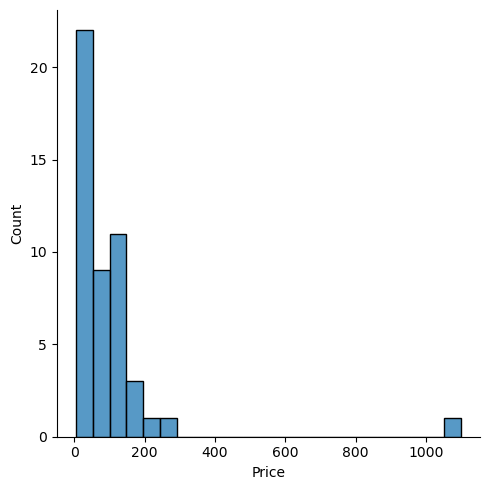

In [24]:
sns.displot(data=GP_df, x='Price')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking price depends on what the most?

Mean Squared Error: 4859.663297694871
Root Mean Squared Error: 69.71128529653481
Feature Importances: {'Rating Count': 0.8692561779214802, 'Rating': 0.13074382207851973}


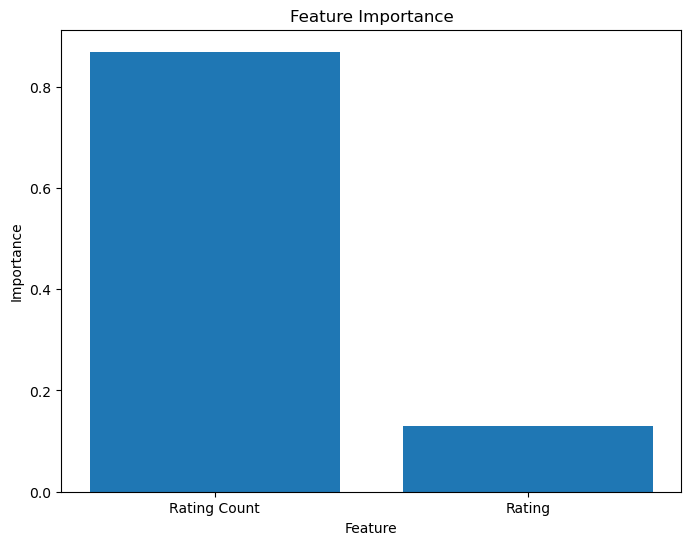

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming GP_df is your dataframe and 'Price' is the target variable
X = GP_df[['Rating Count', 'Rating']]  # Independent variables
y = GP_df['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Feature Importance (optional)
feature_importance = rf_model.feature_importances_
print(f"Feature Importances: {dict(zip(X.columns, feature_importance))}")

# Plotting feature importances (optional)
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### to see how relation of each happeining with rest

/Users/ahadmoeen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


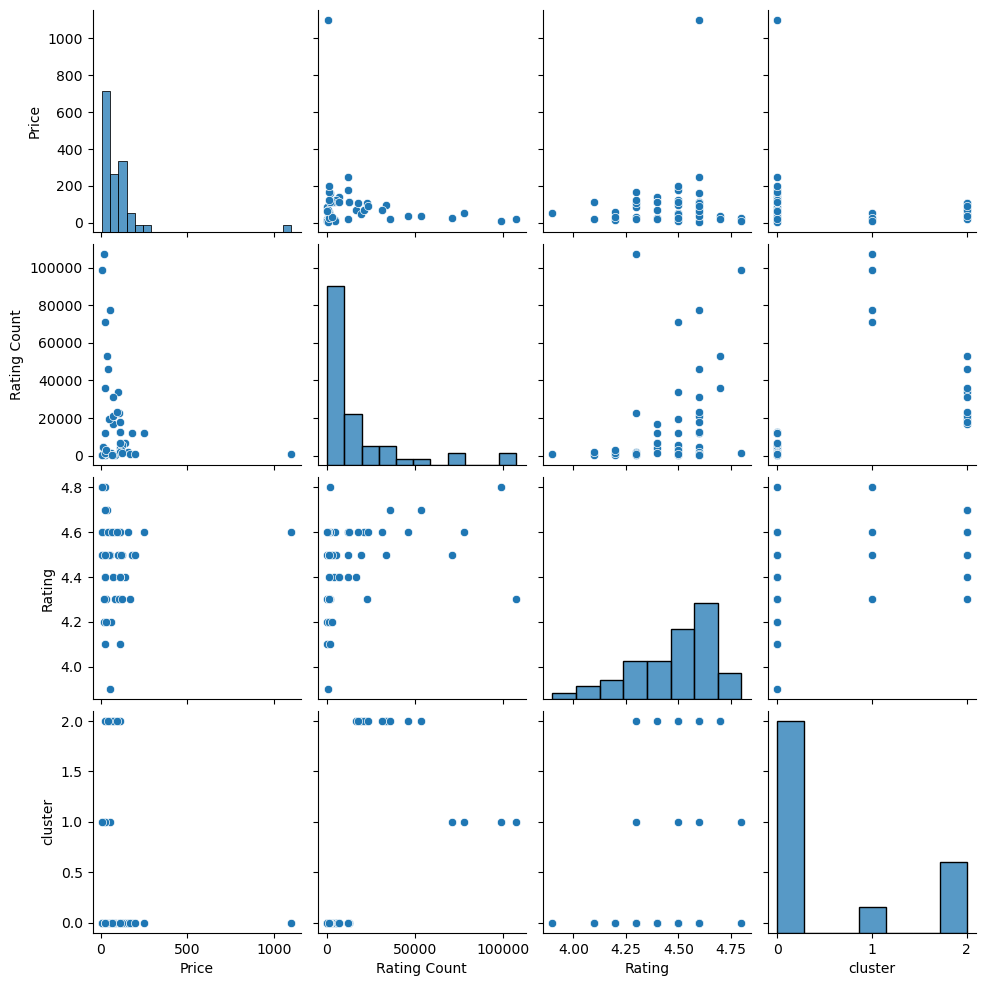

In [35]:
sns.pairplot(GP_df)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)### checking each rating product's price

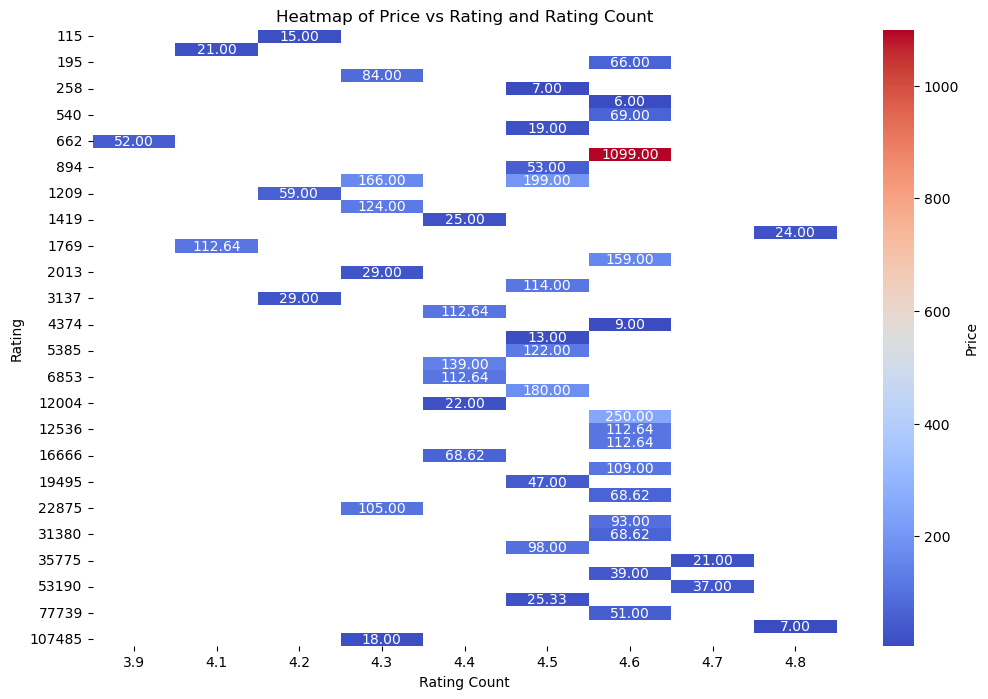

In [52]:
pivot = GP_df.pivot_table(values='Price', index='Rating', columns='Rating Count', aggfunc='mean').T
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Price'})
plt.title('Heatmap of Price vs Rating and Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

by heatmap we can see highest rating products are!

In [73]:
Highest_Rating = GP_df[GP_df['Rating'] == 4.8]
Highest_Rating 

,Title,Price,Rating Count,Rating,Delivery Time,cluster
5,Exquisite Gaming: Call of Duty: Monkeybomb - O...,24.0,1541,4.8,1900-11-26,0
47,Hasbro Gaming Jenga Classic Game with Genuine ...,7.0,98843,4.8,1900-11-26,1


### checking what rating has the most count

<Axes: xlabel='Rating', ylabel='count'>

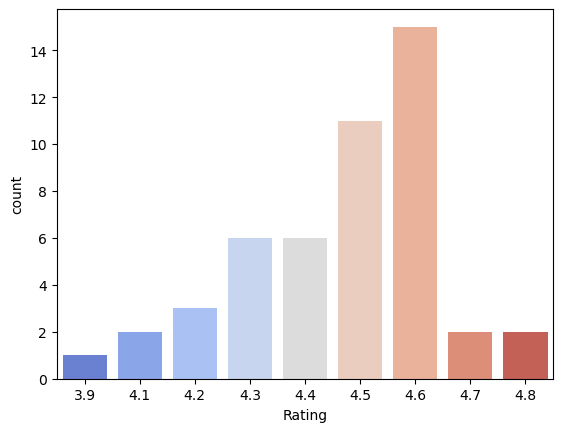

In [54]:
sns.countplot(x='Rating', data=GP_df, palette='coolwarm')

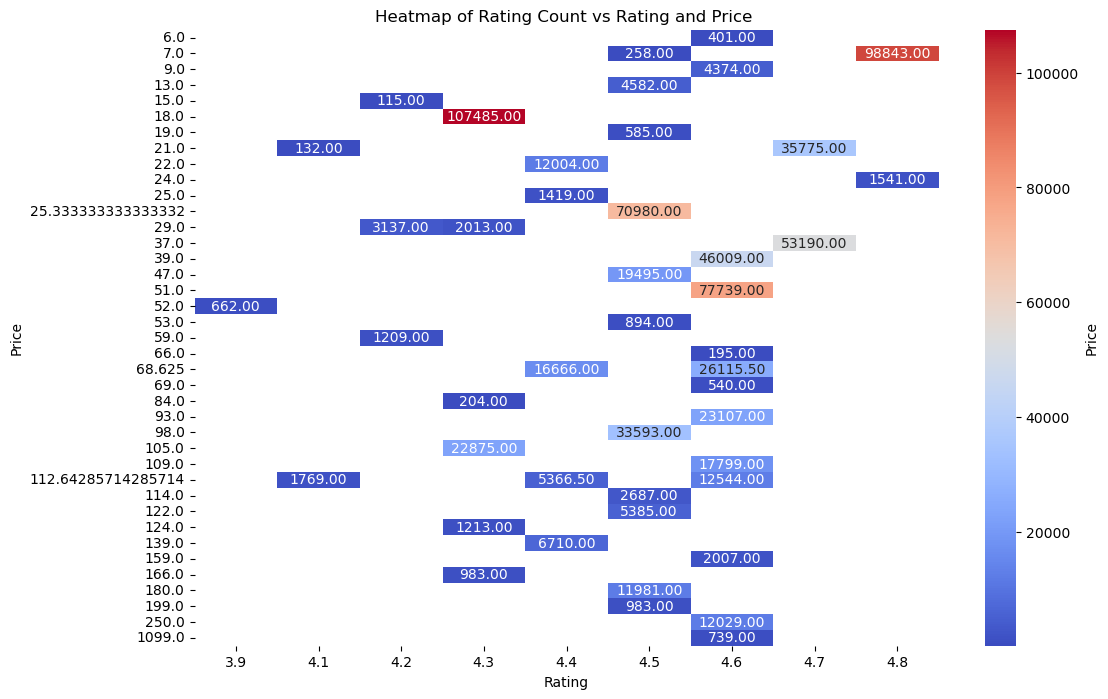

In [82]:
pivot = GP_df.pivot_table(values='Rating Count', index='Rating', columns='Price', aggfunc='mean').T
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Price'})
plt.title('Heatmap of Rating Count vs Rating and Price ')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

as we see price increases rating count decreases so people buy less expensive product more

In [85]:
GP_df['Price', 'Rating Count'].corr()

KeyError: ('Price', 'Rating COunt')